#### Hello Team, I think this is your first encounter with neural networks. This mini-project is to help you understand the various steps of learning with a neural network. This time, together you'll create a simple feed-forward neural net. Complexity of the neural nets that you'll create will keep increasing with time.

#### The learning problem: We'll try to create an AI that can recognize handwritten digits in the famous MNIST database (the same one 3Blue1Brown's video series on neural networks is based on, if you haven't watched at least the first two videos in the series, I can guarantee you that you won't find a more clear/visual explanation on the web).

#### How it's going to work: Below I have laid out the different steps in the process. Every member's task is to write the part of the code that he/she has been assigned to. If your understanding of how an ANN works is clear, hopefully all your contributions will wake up our AI (even if you don't communicate with each other!). 

#### We'll be using Keras to implement the neural network as I've said before. Steps are of course sequential. Good luck!

# ref: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [1]:
# import the dataset 
import numpy as np
from keras.datasets import mnist# <--- My contribution to our little AI
(trainX, trainy), (testX, testy) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Step - 1: Create the data pipeline to feed the network (To be done by member 1)
"""
You have an image (or loads of them) which will give you a numeric feature vector that 
can be fed to the input layer of the neural net. But is that all the network is hungry for? No.
It also requires a label for the image, in this case 0 or 1 or ... or 9. But the output layer of a 
neural net is often a probability distribution (meaning the sum of all the node-values or the 
activations of the output layer is 1) and the number of nodes in the output layer = number of 
different possible labels or class which for this case is 10. This means that you can interpret the 
activation of the j-th node in the output layer as the probability that the input belongs to the 
j-th class or has the j-th label. If you think about the cost function, you'll understand that we 
should convert our rudimentary labels into probability vectors too. So an image depicting 2 should 
have the label (0,0,1,0,...,0).
"""

"""
Your mission should you choose to accept it, is to:
1. Create a Python object called digits having two attributes train, test
2. Make sure digit.train and digit.test are objects of the same type having two 
attributes features(=array of all the feature vectors) and labels(=array of all the label vectors).
Every element of features is a numeric array representing an image 
(might be an array of greyscale intensity, might be something else).
"""
class Dataset():
    def __init__(self,train,test):
        self.train = train
        self.test = test
class Data():
    def __init__(self,features,labels):
        self.features = features
        new_labels=np.zeros([labels.shape[0],10])
        for i,label in enumerate(labels):
            new_labels[i,label]=1
        self.labels= new_labels 

In [3]:

train=Data(trainX,trainy)
test=Data(testX,testy)
digits=Dataset(train,test)
# to import train features: digits.train.features
# to import train features: digits.train.labels


In [4]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation
# Step - 2: Design the network (To be done by member 2)
"""
The feature and label vectors have already determined the number of nodes in the input, output layers.
But so many things are still unknown! Like the number of hidden layers, the number of nodes in each 
hidden layer, the activation functions.... Your duty might look heavy but I assure you it's only a 
few lines of code.
"""

"""
The set of codes here achieve the following tasks:
1. Create a Sequential object and name it model.
2. Add input, hidden and output layers to it with proper activation functions.
3. Make sure the activation function for the output layer is softmax, otherwise 
we won't get a probability vector as the output! 
4. Compile the model i.e. choose a loss function and optimizer for our neural net.
5. Learn from the training samples using model.fit with a proper number of epochs 
and batch_size and store the result in an object named learning_history.
"""

#Create a model by instantiating an object of the class sequential
model=Sequential()

#We need to add layers to our model by specifying no. of neurons and activation 
#function along with other parameters set to their default values

"""A dense layer is a type of layer where each neuron is connected to 
every other neuron in the previous layer"""
#The first layer
model.add(Flatten(input_shape=(28,28)))

#The Hidden Layers:relu is rectified linear(look up wikipedia)
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))    

#Output layer must have 'softmax' activation(look up wikipedia)as we want probabilities in the output layer.
model.add(Dense(10,activation='softmax'))

#The Last step is to compile the model by specifying the cost-function 
#and the optimization method used to learn the parameters(weights of the NN)
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

#Now train the data on the training Data Set and evlaute on test Data set
learning_history=model.fit(digits.train.features,train.labels,batch_size=1000,epochs=50,shuffle=True)

# Saving the model
#model.save('knowledge.h5')

# If one wants to delete the current model in memory
#del model



Epoch 1/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1660 - accuracy: 0.1602
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1472 - accuracy: 0.2569
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1392 - accuracy: 0.2967
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1289 - accuracy: 0.3474
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1194 - accuracy: 0.3954
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1129 - accuracy: 0.4287
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1097 - accuracy: 0.4450
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1082 - accuracy: 0.4526
Epoch 9/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1072 - accuracy: 0.4577
Epoch 10/50
60000/60000 [==============================

In [5]:

# Saving the model
model.save('knowledge.h5')


In [6]:
# Step - 3: Save/Load and Test our AI (To be done by member 3)
# Loading the model
from keras.models import load_model
our_1st_ai=load_model('knowledge.h5')

"""
Last but not the least:
1. Save our model as knowledge.h5 file in the same folder as this notebook for future use.
2. Load the neural network saved in knowledge.h5 into an object named our_1st_ai.
3. Output the accuracy score of our_1st_ai on the training and test samples separately.
4. Plot the loss function and model accuracy as a function of epochs using learning_history. 
"""

score_test,acc_test=model.evaluate(digits.test.features,digits.test.labels,batch_size=100)
score_train,acc_train=model.evaluate(digits.train.features,digits.train.labels,batch_size=100)
print('Train score:%.4f '%score_train,'Test Score: %.4f '%score_test)
print('Train Accuracy: %.2f'%(acc_train*100),'Test Accuracy: %.2f'%(acc_test*100))

60000/60000 [==============================] - 2s 28us/step
Train score:0.0676  Test Score: 0.0678 
Train Accuracy: 65.67 Test Accuracy: 65.59


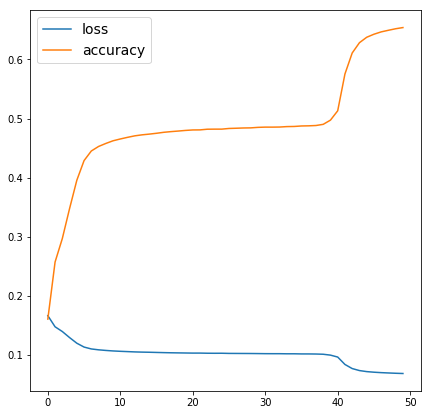

In [10]:
import matplotlib.pyplot as plt
loss=model.history.history['loss']
acc=model.history.history['accuracy']
plt.figure(figsize=(7,7))
plt.plot(loss,label = 'loss')
plt.plot(acc,label = 'accuracy')
plt.legend(fontsize=14)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd3457f828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd3457feb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd3457f438>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd34510588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd345108d0>],
 'means': []}

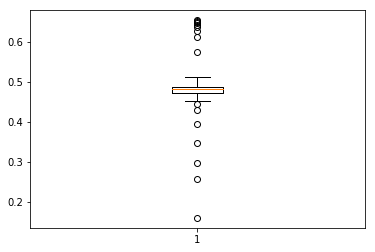

In [8]:
plt.boxplot(acc)


In [9]:
# make a prediction for a an image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape( 1,28, 28)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('knowledge.h5')
    # predict the class
    digit = model.predict_classes(img)
    print(digit[0])
# entry point, run the example
run_example()

/home/srashti/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7
